# pymofa tutorial
last updated: 2016-09-05

This notebook introduces the basic functionalities of pymofa, the python modeling framework to run and evaluate your models systematically ;)

In [1]:
cd ..

/home/barfuss/ZimBox/Software/pymofa


... to pymofa root

In [2]:
from pymofa import experiment_handling as eh

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

## Dummy discrete predetor prey model
First we need to create a dummy model. Let's use a discrete version of the famous predetor prey model.


In [4]:
def predprey_model(prey_birth_rate, prey_mortality, 
                   predator_efficiency, predator_death_rate,
                   initial_prey, initial_predators,
                   time_length):
    """Discrete predetor prey model."""
    A = -1 * np.ones(time_length)
    B = -1 * np.ones(time_length)
    A[0] = initial_prey
    B[0] = initial_predators
    for t in xrange(1, time_length):
        A[t] = A[t-1] + prey_birth_rate * A[t-1] - prey_mortality * B[t-1]*A[t-1]
        B[t] = B[t-1] + predator_efficiency * B[t-1]*A[t-1] - predator_death_rate * B[t-1] +\
            0.01 * np.random.randn()
    return A, B

**Example usage**:

In [5]:
preys, predators = predprey_model(0.1, 0.1, 0.1, 0.01, 1.0, 1.0, 1000)

<IPython.core.display.Javascript object>


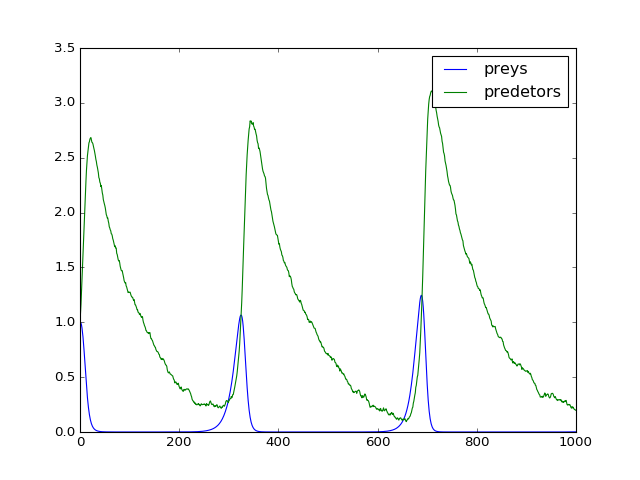

In [7]:
plt.plot(preys, label="preys") 
plt.plot(predators, label="predators")
plt.legend()